In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv
/kaggle/input/consumer-reviews-of-amazon-products/1429_1.csv
/kaggle/input/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv


# **1.Keşifsel Veri Analizi (EDA)**
Keşifsel veri analizi ile beraber Amazon ürünlerinin tüketici yorumları verisini anlamaya çalışarak yapısını tanımak ve gelecekteki modelleme aşamalarına ışık tutacak içgörüler elde edilecek.Bu aşamada veri hakkında bilgiler edinerek bu bilgileri grafiklere dökmek ve grafiklerden çıkarım yapılacak

In [3]:
import warnings
warnings.filterwarnings("ignore")


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

**Amazon Ürünlerinin Tüketici Yorumları Verisinin Yüklenmesi ve Verilere Genel Bakış**



In [5]:
df = pd.read_csv("/kaggle/input/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


**Sütunların ve Veri Tiplerinin İncelenmesi**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5000 non-null   object 
 1   dateAdded            5000 non-null   object 
 2   dateUpdated          5000 non-null   object 
 3   name                 5000 non-null   object 
 4   asins                5000 non-null   object 
 5   brand                5000 non-null   object 
 6   categories           5000 non-null   object 
 7   primaryCategories    5000 non-null   object 
 8   imageURLs            5000 non-null   object 
 9   keys                 5000 non-null   object 
 10  manufacturer         5000 non-null   object 
 11  manufacturerNumber   5000 non-null   object 
 12  reviews.date         5000 non-null   object 
 13  reviews.dateAdded    1052 non-null   object 
 14  reviews.dateSeen     5000 non-null   object 
 15  reviews.doRecommend  5000 non-null   b

Amazon Ürünlerinin Tüketici Yorumları Verisinin Sütunları

In [7]:
print(df.columns)

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')


reviews.rating hedef değişkendir.Sınıflandırma için kullanılır(örn. 1-5 yıldız)

In [10]:
df["reviews.rating"].value_counts()

reviews.rating
5    3478
4    1208
3     197
1      63
2      54
Name: count, dtype: int64

**Kategorik Verilerin Dağılımı**


Bu kısımda kategorik veriler olarak müşterilerin değerlendirmelerine(1-5yıldız),

<Axes: xlabel='reviews.rating'>

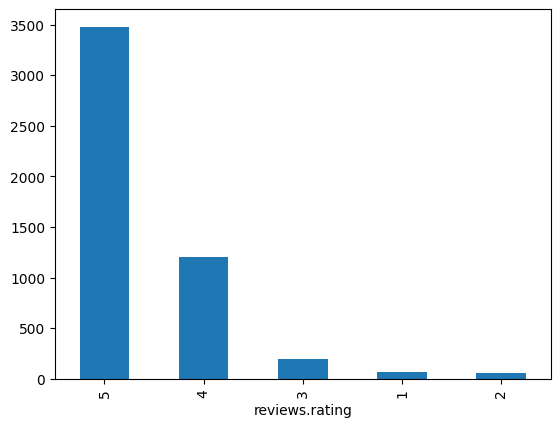

In [11]:
df["reviews.rating"].value_counts().plot(kind="bar")

Burda ise kullanıcıların ürünü başkasına önerip önermediğini belirten "reviews.doRecommend" sütununundaki verilerin dağılımı

<Axes: xlabel='reviews.doRecommend'>

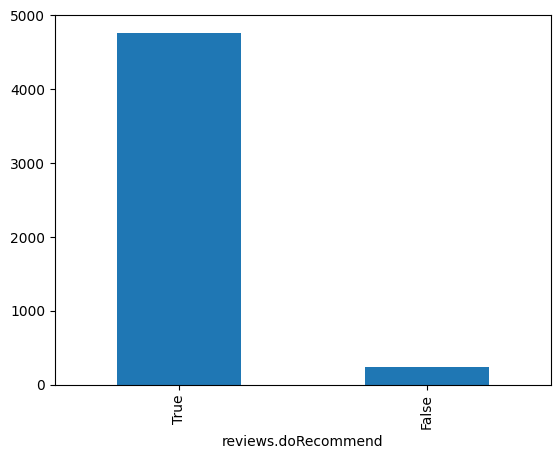

In [12]:
df["reviews.doRecommend"].value_counts().plot(kind="bar")

"name" sütunu ürünlerin adını belirtir.Bu aşamada her üründen kaçar adet olduğunu buluyoruz.

<Axes: xlabel='name'>

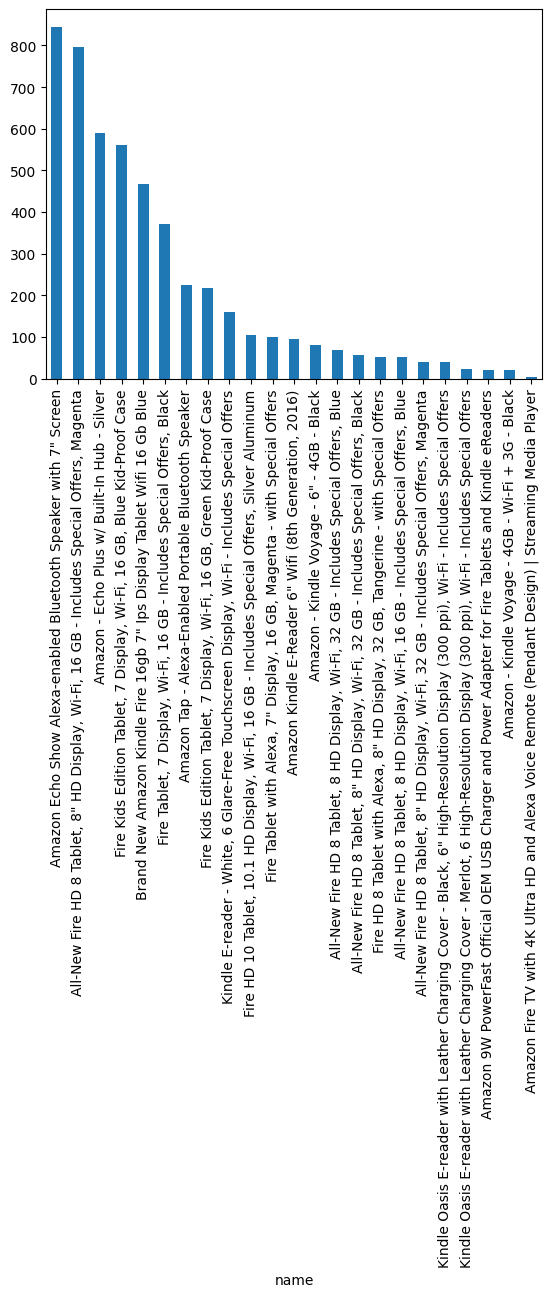

In [13]:
df["name"].value_counts().plot(kind="bar")

**Sayısal Verilerin Dağılımı**

Müşterilerin değerlendirmeleri "reviews.rating" sayısal bir sütun olduğu için bu sütunun sayısal dağılımı yapılıyor.

Text(0.5, 1.0, 'Rating Dağılımı')

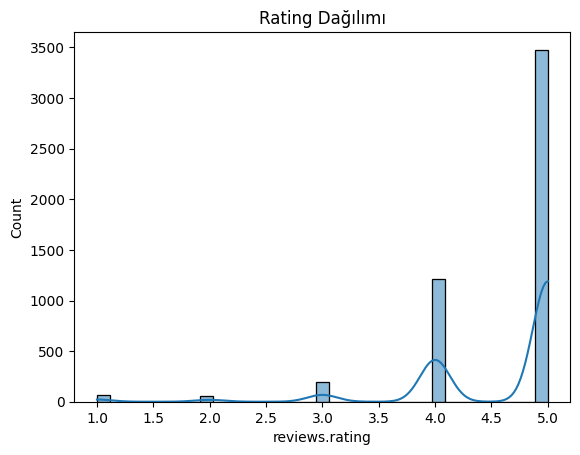

In [14]:
sns.histplot(df['reviews.rating'], kde=True)
plt.title("Rating Dağılımı")

"reviews.numHelpful" sütunu,bir yorumu kaç kişi tarafından faydalı bulunduğunu gösterir.Yani, kullanıcıların o yorumu ne kadar yararlı bulduğunu sayısal olarak ifade eder. Bu veri, yorumların güvenilirliği veya kalitesi hakkında fikir verir ve ürün değerlendirmelerinde hangi yorumların diğer kullanıcılar için daha değerli olduğunu anlamaya yardımcı olur."reviews.numHelpful" sütununun dağılımını çıkarıyoruz.

Text(0.5, 1.0, 'Num Helpful Dağılımı')

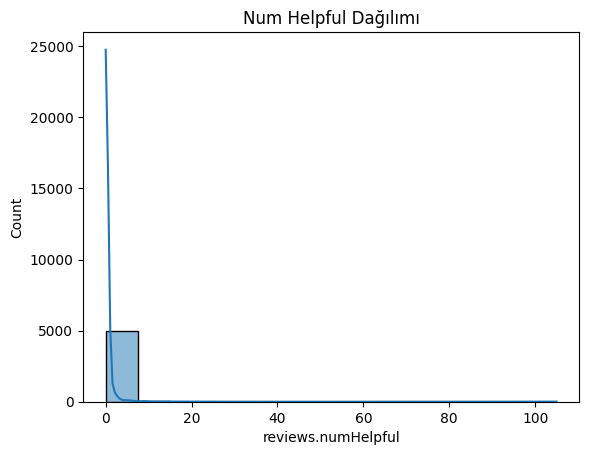

In [15]:
sns.histplot(df['reviews.numHelpful'], kde=True)
plt.title("Num Helpful Dağılımı")

"reviews.date" sütunu, her bir yorumun yapıldığı tarihi gösterir. Bu sütun, yorumların zaman içindeki dağılımını incelemek, trend analizleri yapmak veya belirli dönemlerdeki kullanıcı geri bildirimlerini değerlendirmek için kullanılır."reviews.date" sütunun dağılımını çıkarıyoruz.

Text(0.5, 1.0, 'Tarih Dağılımı')

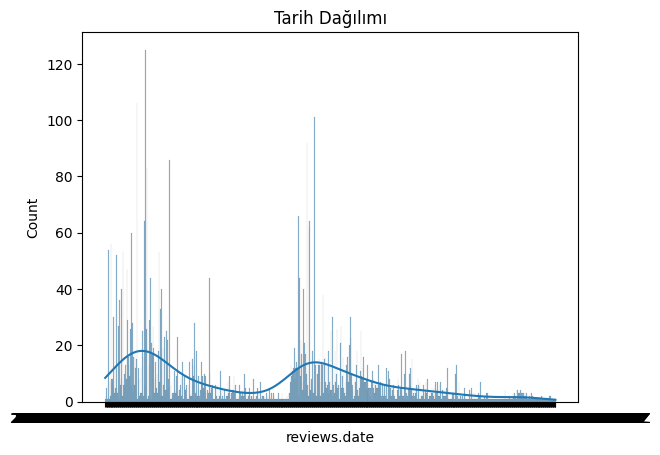

In [16]:
sns.histplot(df['reviews.date'], kde=True)
plt.title("Tarih Dağılımı")

**Yorum Metinlerinin Uzunluğu**


Bu kısımda Amazon ürünlerinin müşteri yorumlarının metin uzunluklarını inceleyeceğiz.

Text(0.5, 1.0, 'Yorum Uzunluğu Dağılımı')

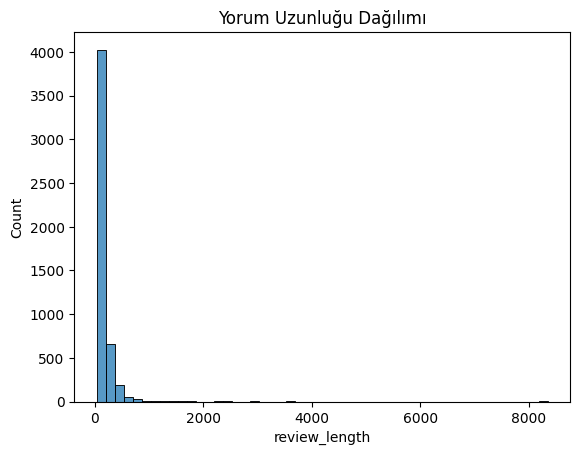

In [17]:
df["review_length"] = df["reviews.text"].astype(str).apply(len)
sns.histplot(df["review_length"],bins=50)
plt.title("Yorum Uzunluğu Dağılımı")

Amazon ürünlerinin müşteri yorumlarının metin uzunluklarının 5 örneğinin incelenmesi.

In [18]:
df["reviews.text"].sample(5).values

array(['This is the best kindle ereader yet. The size and weight make it perfect for comfortable reading. You will find yourself reading more books than ever with it.',
       'I just love this tap!! It is so much fun. The music is so great. I play the relation music every night,every night. Best thing ever!',
       'Great upgrade/replacement. No problems with it at all.',
       'The echo show works very well with Bluetooth and WiFi. Great sound and screen. Recommend to anyone',
       'Bought this to use on my travels. comes in handy surfing the web.'],
      dtype=object)

"reviews.id" sütununu analizden çıkarıp"reviews.numHelpful","reviews.rating","review_length" sütunlarının biribiri arasındaki korelasyonunu inceliyoruz.
1. **reviews.numHelpful vs reviews.rating: -0.067 (Çok Zayıf Negatif Korelasyon)**
   Bu, bir yorumun aldığı puan (rating) ile kaç kişi tarafından faydalı bulunduğu arasında anlamlı bir doğrusal ilişki olmadığını gösteriyor.
2. **reviews.numHelpful vs review_length: 0.63 (Orta Derecede Pozitif Korelasyon)**
   Bu, daha uzun yorumların genellikle daha fazla kişi tarafından faydalı bulunduğunu gösterir. Bu mantıklıdır, çünkü daha uzun yorumlar genellikle daha fazla detay ve açıklama içerir.
3. **reviews.rating vs review_length: -0.073 (Çok Zayıf Negatif Korelasyon)**
   Bu da, yorumun puanı ile uzunluğu arasında güçlü bir doğrusal ilişki olmadığını gösterir. Yüksek veya düşük puanlı yorumlar illa ki uzun veya kısa olmak zorunda değil. Bu da kabul edilebilir bir sonuçtur.

"reviews.id" sütununu çıkardıktan sonra elde ettiğiniz bu korelasyon matrisi, veri setinizdeki sayısal özelliklerin birbirleriyle olan ilişkilerini daha net ve yorumlanabilir bir şekilde gösteriyor. Bu yaklaşım, veri analizinde daha doğru içgörüler elde etmek için çok daha uygundur.

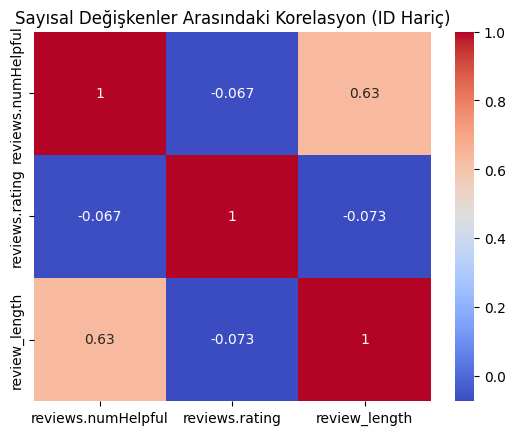

In [19]:

numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df_filtered = numeric_df.drop(columns=['reviews.id'])
sns.heatmap(numeric_df_filtered.corr(), annot=True, cmap="coolwarm")
plt.title("Sayısal Değişkenler Arasındaki Korelasyon (ID Hariç)")
plt.show()

**Zaman Serisi**

Bu kısımda yıllara göre Amazon ürünlerinin yorum sayısını inceleyeceğiz.

Text(0.5, 1.0, 'Yıllara Göre Yorum Sayısı')

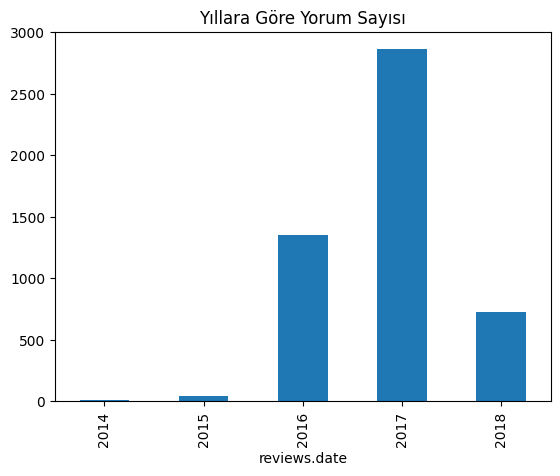

In [20]:
df['reviews.date'] = pd.to_datetime(df['reviews.date'])
df['reviews.date'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title("Yıllara Göre Yorum Sayısı")

# 2.Veri Ön İşleme(Data Preprocessing)
Bu kısımda eksik verileri kontrol ederek eksik verileri temizleme,verilerdeki aykırı değerleri yönetme,hedef değişken(label) hazırlama,kategorik verileri sayısallaştırma(encoding),sayısal özellikleri normalleştirme / standardizasyon ve veri kümesini train / test olarak bölme işlemleri ile veriler üzerinde ön işleme adımlarını gerçekleştiriyoruz.

**Eksik Verilerin Kontrolü**  
Sütunlardaki eksik verileri kontrol ediyoruz."reviews.dateAdded","reviews.id","reviews.title"ve "reviews.username" sütunlarında kaç tane eksik veriler olduğunu inceliyoruz.

In [21]:
df.isnull().sum()

id                        0
dateAdded                 0
dateUpdated               0
name                      0
asins                     0
brand                     0
categories                0
primaryCategories         0
imageURLs                 0
keys                      0
manufacturer              0
manufacturerNumber        0
reviews.date              0
reviews.dateAdded      3948
reviews.dateSeen          0
reviews.doRecommend       0
reviews.id             4971
reviews.numHelpful        0
reviews.rating            0
reviews.sourceURLs        0
reviews.text              0
reviews.title            13
reviews.username          1
sourceURLs                0
review_length             0
dtype: int64

**Eksik Verileri Temizleme**

'reviews.text' ve'reviews.rating' sütunları üzerinde çalışacağız.Bu sütunlarda eksik veri yok fakat burda kodun okunabilirliğini arttırmak için hangi sütunları modelde kullanması planladığı açıkça gösterildi. 

In [22]:
df = df.dropna(subset=['reviews.text', 'reviews.rating'])

**Aykırı Değerleri Yönetme**

Aykırı değer analizi genellikle sayısal sütunlar için yapılır.İlk olarak "reviews.text" sütununda yorum metinlerinin uzunluğunu buluyoruz ardından metinlerin describe() fonksiyonu ile yorumları sayma vb. işlemler yapılıyor.

In [23]:
df["review_length"]=df["reviews.text"].astype(str).apply(len)
df["review_length"].describe()


count    5000.000000
mean      161.348400
std       242.597383
min        45.000000
25%        71.000000
50%       105.500000
75%       182.000000
max      8351.000000
Name: review_length, dtype: float64

Oluşturmuş olduğumuz "review_length" ile aşağıda aykırı değerleri (outliers) tespit ediyoruz ve bu aykırı değerleri içeren satırları DataFrame'den çıkarmak için kullanıyoruz.


In [24]:
Q1 = df['review_length'].quantile(0.25)
Q3 = df['review_length'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[(df['review_length'] >= lower) & (df['review_length'] <= upper)]

**Hedef Değişken (Label) Hazırlama**

Yorum puanlarını (reviews.rating) ikili sınıflandırma yaparak 0 ve 1 olarak etiketleme yapılıyor.

In [25]:
df['label'] = df['reviews.rating'].apply(lambda x: 1 if x > 3 else 0)


**Kategorik Verileri Sayısallaştırma(Encoding)**
Kategorik olan sütunları One-Hot Encoding ile sayısallaştırma işlemi yapıyoruz.


In [26]:
df['doRecommend'] = df['reviews.doRecommend'].map({True: 1, False: 0})


In [27]:
df = pd.get_dummies(df, columns=['brand','primaryCategories','manufacturer'], drop_first=True) 

**Sayısal Özellikleri Normalleştirme/Standardizasyon**


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[["review_length", "reviews.numHelpful"]] = scaler.fit_transform(df[["review_length", "reviews.numHelpful"]])


**Veri Kümesini Train/Test Olarak Bölme**

Bu kısımda X değişkeni yani özellikleri ve y hedef değişkeni belirliyoruz belirlediğimiz değişkenleri train_test_split fonksiyonu ile verilerin %20 si test kümesi %80'i train kümesi olarak ayrılıyor.stratify=y ile ise veri bölme işleminin hedef değişken (y) içindeki sınıf oranlarını koruyarak yapılacağı anlamına gelir.

In [29]:
from sklearn.model_selection import train_test_split

X = df[['review_length', 'doRecommend', 'reviews.numHelpful']]  # Özellikler
y = df['label']  # Hedef değişken

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


**Algoritma Seçimi ve Model Eğitimi**

Bu aşamada gözetimli öğrenme algoritmalarını inceleyip karşılaştıracağız."reviews.text" gibi metin tabanlı ve sayısal özelliklere göre yorumun olumlu(1) ya da olumsuz(0) olup olmadığını tahmin edeceğiz.

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}: Ortalama Doğruluk = {np.mean(scores):.4f}")

Logistic Regression: Ortalama Doğruluk = 0.9702
Decision Tree: Ortalama Doğruluk = 0.9629
Random Forest: Ortalama Doğruluk = 0.9651
SVM: Ortalama Doğruluk = 0.9699
KNN: Ortalama Doğruluk = 0.9675


Gözetimli öğrenmede en iyi modeli Logistik Regresyon olarak bulmuş olduk. 

**Hiperparamatre Optimizasyonu(Grid Search)**

Logistic regresyon modelinin doğruluğunu artırmak için en iyi hiperparametre kombinasyonunu Grid Search yöntemiyle buluyoruz.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Parametre arama alanı
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# GridSearchCV nesnesi
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Modeli eğit
grid_search.fit(X_train, y_train)

# Sonuçları göster
print("En iyi hiperparametreler:", grid_search.best_params_)

# En iyi modeli al
best_model = grid_search.best_estimator_

En iyi hiperparametreler: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


En iyi hiperparametre kombinasyonu ile modelin aşırı öğrenme riskini azaltıyor ve bu sayede daha iyi genelleyen bir model elde edilmiş olur.Logistic Regresyon için en iyi hiperparametreleri (C,penalty,solver) bulmak amacıyla GridSearchCV kullanarak bir ızgara araması yapılıyor.En iyi hiperparametreleri  {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'} olarak elde ediyoruz

**Test Verisi Üzerinde Tahmin ve Değerlendirme**

Bu kısımda modelin değerlendirme metrikleri olan Accuracy,Precision,Recall ve F1 Skor değerlerini inceliyoruz.

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Test kümesi üzerinde tahmin
y_pred = best_model.predict(X_test)

# Değerlendirme metrikleri
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Sonuçları yazdır
print("Doğruluk (Accuracy):", accuracy)
print("Kesinlik (Precision):", precision)
print("Duyarlılık (Recall):", recall)
print("F1 Skoru:", f1)

Doğruluk (Accuracy): 0.9675324675324676
Kesinlik (Precision): 0.9651379612294455
Duyarlılık (Recall): 0.9675324675324676
F1 Skoru: 0.9658603751403592


Bu metrik değerleri (hepsi yaklaşık %96.5'in üzerinde), Lojistik Regresyon modelinizin test verisi üzerinde çok güçlü bir performans sergilediğini göstermektedir. Modeliniz, hem doğru tahmin etme oranı, hem pozitif tahminlerdeki doğruluğu, hem de gerçek pozitifleri yakalama yeteneği açısından oldukça başarılıdır. Bu değerler, modelin iyi eğitildiğini ve genelleme yeteneğinin yüksek olduğunu düşündürmektedir.

**Sınıflandırma Raporu**



In [35]:
from sklearn.metrics import classification_report

# Sınıflandırma raporu
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))


Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.76      0.61      0.67        51
           1       0.98      0.99      0.98       873

    accuracy                           0.97       924
   macro avg       0.87      0.80      0.83       924
weighted avg       0.97      0.97      0.97       924



**Karışıklık Matrisi**

Bu kısımda modelin hangi sınıfları doğru veya yanlış tahmin ettiğini görselleştirmek için karışıklık matrisi (confusion matrix) oluşturulur.Yanlış sınıflandırmaları confusion matrix ile daha kolay görmemizi sağlar.

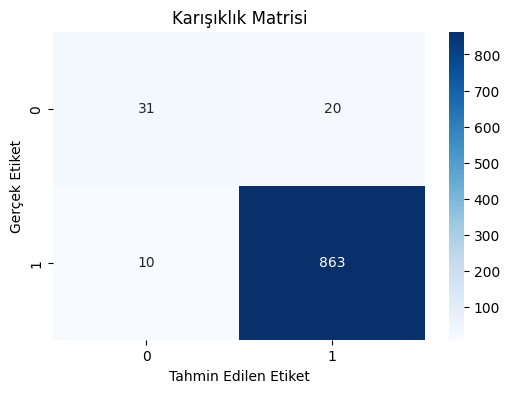

In [34]:
# Karışıklık Matrisi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Karışıklık Matrisi")
plt.xlabel("Tahmin Edilen Etiket")
plt.ylabel("Gerçek Etiket")
plt.show()